## https://anaconda.org/conda-forge/jieba

In [8]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
import re
from collections import Counter

In [2]:
# 讀取從 pandas 來的結構化資料，但內文的句子尚未擷取出合適斷詞
orgdata = pd.read_csv('python_資料彙整_csv_new.csv')

In [3]:
orgdata.head()

,Unnamed: 0,案號,內文,法規,審判長,裁判類型,案由,判決時間
0,0,"105,投小,319",臺灣南投地方法院民事小額判決105年度投小字第319號原告泰安產物保險股份有限公司法定代理人...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日
1,1,"107,訴,1641",臺灣桃園地方法院民事判決107年度訴字第1641號原告新光產物保險股份有限公司桃園分公司法定...,"['民法第203條', '民法第196條', '民法第196條第1項', '民法第233條第...",廖珮伶,民事判決,損害賠償,107 年 9 月 3 日
2,2,"106,士小,787",臺灣士林地方法院小額民事判決106年度士小字第787號原告新安東京海上產物保險股份有限公司法...,"['民法第184條第1項', '民法第196條', '民事訴訟法第436條之24第2項', ...",張明儀,民事判決,侵權行為損害賠償,106 年 8 月 11 日
3,3,"105,湖小,595",臺灣士林地方法院小額民事訴訟判決105年度湖小字第595號原告旺旺友聯產物保險股份有限公司法...,"['民法第196條', '營利事業所得稅查核準則第95條第6項', '民法第217條第1項'...",黃紀錄,民事判決,損害賠償,105 年 8 月 15 日
4,4,"105,投小,392",臺灣南投地方法院民事小額判決105年度投小字第392號原告新光產物保險股份有限公司台中分公司...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日


In [4]:
# 結巴套件的練習，和檔案內容無關

documents = ['我是東吳大學資料科學系蔡芸琤老師']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\pecu6\AppData\Local\Temp\jieba.cache
Loading model cost 0.358 seconds.
Prefix dict has been built successfully.


我/是/東/吳大學/資料/科學系/蔡芸/琤/老師


In [5]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/東吳大學/資料科學系/蔡芸琤/老師


In [6]:
orgdata['seg'] = ""
orgdata.head()

,Unnamed: 0,案號,內文,法規,審判長,裁判類型,案由,判決時間,seg
0,0,"105,投小,319",臺灣南投地方法院民事小額判決105年度投小字第319號原告泰安產物保險股份有限公司法定代理人...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日,
1,1,"107,訴,1641",臺灣桃園地方法院民事判決107年度訴字第1641號原告新光產物保險股份有限公司桃園分公司法定...,"['民法第203條', '民法第196條', '民法第196條第1項', '民法第233條第...",廖珮伶,民事判決,損害賠償,107 年 9 月 3 日,
2,2,"106,士小,787",臺灣士林地方法院小額民事判決106年度士小字第787號原告新安東京海上產物保險股份有限公司法...,"['民法第184條第1項', '民法第196條', '民事訴訟法第436條之24第2項', ...",張明儀,民事判決,侵權行為損害賠償,106 年 8 月 11 日,
3,3,"105,湖小,595",臺灣士林地方法院小額民事訴訟判決105年度湖小字第595號原告旺旺友聯產物保險股份有限公司法...,"['民法第196條', '營利事業所得稅查核準則第95條第6項', '民法第217條第1項'...",黃紀錄,民事判決,損害賠償,105 年 8 月 15 日,
4,4,"105,投小,392",臺灣南投地方法院民事小額判決105年度投小字第392號原告新光產物保險股份有限公司台中分公司...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日,


## https://github.com/fxsjy/jieba

In [9]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['內文']:
    documents = re.sub('\d+', '', documents)
    documents = re.sub('[a-zA-Z0-9]+', '', documents)    
    seg_list = jieba.analyse.extract_tags(documents, topK=50, withWeight=False, allowPOS=()) 
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\pecu6\AppData\Local\Temp\ipykernel_27132\4146383266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['seg'].iloc[index] = seg_list


In [10]:
orgdata['seg']

0     [第條, 本件, 原告, 被告, 車禍, 爭車, 賠償, 損害, 第項, 本院, 過失, 請...
1     [被告, 第條, 車輛, 請求, 原告, 賠償, 保險, 系爭, 本件, 泰元, 第項, 本...
2     [賠償, 第條, 原告, 被告, 請求, 第項, 損害, 過失, 規定, 金額, 上訴, 負...
3     [車輛, 系爭, 被告, 原告, 發生, 過失, 賠償, 被害人, 駕駛, 本件, 車禍, ...
4     [第條, 原告, 本件, 被告, 賠償, 第項, 車禍, 本院, 損害, 系爭, 爭車, 規...
                            ...                        
95    [本院, 原告, 被告, 保險, 第條, 請求, 折舊, 計算, 規定, 第頁, 代位, 車...
96    [車輛, 被告, 第條, 原告, 損害, 第項, 系爭, 本院, 賠償, 計算, 規定, 行...
97    [原告, 被告, 請求, 賠償, 第條, 車輛, 發生, 引車, 本件, 車禍, 駕駛, 第...
98    [被告, 原告, 請求, 車輛, 損害, 第條, 賠償, 過失, 發生, 費用, 折舊, 負...
99    [原告, 車輛, 被告, 賠償, 第條, 請求, 年月日, 損害, 計算, 算式, 系爭, ...
Name: seg, Length: 100, dtype: object

## 取出判決年，可用此概念再抽取出其他屬性

In [11]:
date_split = orgdata['判決時間'].iloc[0].split('年')

In [12]:
date_split[0]

'   105    '

In [13]:
orgdata['year'] = ""
index = 0
for documents in orgdata['判決時間']:
    date_split = documents.split('年')
    orgdata['year'].iloc[index] = re.sub(r"\s+", "", date_split[0])
    index += 1

C:\Users\pecu6\AppData\Local\Temp\ipykernel_27132\1872293280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orgdata['year'].iloc[index] = re.sub(r"\s+", "", date_split[0])


In [14]:
orgdata.head()

,Unnamed: 0,案號,內文,法規,審判長,裁判類型,案由,判決時間,seg,year
0,0,"105,投小,319",臺灣南投地方法院民事小額判決105年度投小字第319號原告泰安產物保險股份有限公司法定代理人...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日,"[第條, 本件, 原告, 被告, 車禍, 爭車, 賠償, 損害, 第項, 本院, 過失, 請...",105
1,1,"107,訴,1641",臺灣桃園地方法院民事判決107年度訴字第1641號原告新光產物保險股份有限公司桃園分公司法定...,"['民法第203條', '民法第196條', '民法第196條第1項', '民法第233條第...",廖珮伶,民事判決,損害賠償,107 年 9 月 3 日,"[被告, 第條, 車輛, 請求, 原告, 賠償, 保險, 系爭, 本件, 泰元, 第項, 本...",107
2,2,"106,士小,787",臺灣士林地方法院小額民事判決106年度士小字第787號原告新安東京海上產物保險股份有限公司法...,"['民法第184條第1項', '民法第196條', '民事訴訟法第436條之24第2項', ...",張明儀,民事判決,侵權行為損害賠償,106 年 8 月 11 日,"[賠償, 第條, 原告, 被告, 請求, 第項, 損害, 過失, 規定, 金額, 上訴, 負...",106
3,3,"105,湖小,595",臺灣士林地方法院小額民事訴訟判決105年度湖小字第595號原告旺旺友聯產物保險股份有限公司法...,"['民法第196條', '營利事業所得稅查核準則第95條第6項', '民法第217條第1項'...",黃紀錄,民事判決,損害賠償,105 年 8 月 15 日,"[車輛, 系爭, 被告, 原告, 發生, 過失, 賠償, 被害人, 駕駛, 本件, 車禍, ...",105
4,4,"105,投小,392",臺灣南投地方法院民事小額判決105年度投小字第392號原告新光產物保險股份有限公司台中分公司...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日,"[第條, 原告, 本件, 被告, 賠償, 第項, 車禍, 本院, 損害, 系爭, 爭車, 規...",105


In [15]:
Counter(orgdata['year']).keys()

dict_keys(['105', '107', '106', '108', '109', '104', '101', '103', '聖日', '102', '110'])

## 資料清整與補值

In [17]:
orgdata.loc[(orgdata['year'] == '聖日')]

,Unnamed: 0,案號,內文,法規,審判長,裁判類型,案由,判決時間,seg,year
32,32,"108,竹北簡,171",臺灣新竹地方法院民事簡易判決108年度竹北簡字第171號原告明台產物保險股份有限公司法定代理...,"['民法第213條', '民法第196條', '民事訴訟法第389條第1項第5款', '道路...",陳麗芬,民事判決,損害賠償,聖\r\n日,"[第條, 原告, 車輛, 被告, 保險, 請求, 賠償, 訴訟, 竹北, 系爭, 第項, 本...",聖日


In [18]:
orgdata.loc[32, 'year'] = '108'
Counter(orgdata['year']).keys()

dict_keys(['105', '107', '106', '108', '109', '104', '101', '103', '102', '110'])

## 備份整理過後的資料

In [19]:
orgdata.to_csv("LawTech_TextMining.csv", index=False)

## 挑選案由類型進行分析，可用此概念再抽取出其他屬性

In [20]:
words = list(orgdata['案由'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [21]:
df = [show_key, show_values]
result = pd.concat(df, axis=1)
result.columns = ['judge', 'freguency']
result

,judge,freguency
0,損害賠償,80
1,侵權行為損害賠償,19
2,請求侵權行為損害賠償,1


## 繪製 Bar，要與 Histogram 做使用區隔

In [23]:
import plotly.express as px
import pandas as pd

px.bar(result, x='judge', y='freguency', title='judge term from 101 to 110')

## 繪製 Histogram，要與 Bar 做使用區隔

In [24]:
px.histogram(orgdata, x='year', color="案由", title='judge term from 101 to 110')

In [25]:
orgdata['year'] = orgdata['year'].astype(int)

In [26]:
px.histogram(orgdata, x='year', color="案由", title='judge term from 101 to 110')

In [27]:
show_sub = orgdata['案由']=='損害賠償'
subdata = orgdata[show_sub]
subdata.head()

,Unnamed: 0,案號,內文,法規,審判長,裁判類型,案由,判決時間,seg,year
0,0,"105,投小,319",臺灣南投地方法院民事小額判決105年度投小字第319號原告泰安產物保險股份有限公司法定代理人...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日,"[第條, 本件, 原告, 被告, 車禍, 爭車, 賠償, 損害, 第項, 本院, 過失, 請...",105
1,1,"107,訴,1641",臺灣桃園地方法院民事判決107年度訴字第1641號原告新光產物保險股份有限公司桃園分公司法定...,"['民法第203條', '民法第196條', '民法第196條第1項', '民法第233條第...",廖珮伶,民事判決,損害賠償,107 年 9 月 3 日,"[被告, 第條, 車輛, 請求, 原告, 賠償, 保險, 系爭, 本件, 泰元, 第項, 本...",107
3,3,"105,湖小,595",臺灣士林地方法院小額民事訴訟判決105年度湖小字第595號原告旺旺友聯產物保險股份有限公司法...,"['民法第196條', '營利事業所得稅查核準則第95條第6項', '民法第217條第1項'...",黃紀錄,民事判決,損害賠償,105 年 8 月 15 日,"[車輛, 系爭, 被告, 原告, 發生, 過失, 賠償, 被害人, 駕駛, 本件, 車禍, ...",105
4,4,"105,投小,392",臺灣南投地方法院民事小額判決105年度投小字第392號原告新光產物保險股份有限公司台中分公司...,"['民法第213條', '民法第184條第1項', '民事訴訟法第436條之8第1項', '...",張家豪,民事判決,損害賠償,105 年 11 月 24 日,"[第條, 原告, 本件, 被告, 賠償, 第項, 車禍, 本院, 損害, 系爭, 爭車, 規...",105
5,5,"106,沙小,424",臺灣臺中地方法院小額民事判決106年度沙小字第424號原告豐原汽車客運股份有限公司法定代理人...,"['民法第213條', '民法第196條', '民事訴訟法第436條之19', '民法第21...",何世全,民事判決,損害賠償,106 年 10 月 24 日,"[原告, 被告, 車輛, 本件, 第條, 賠償, 車禍, 系爭, 發生, 楊鴻銘, 交通事故...",106


In [28]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [29]:
subdata_seg_list

[['第條',
  '本件',
  '原告',
  '被告',
  '車禍',
  '爭車',
  '賠償',
  '損害',
  '第項',
  '本院',
  '過失',
  '請求',
  '事故',
  '系爭',
  '規定',
  '民法',
  '發生',
  '汽車',
  '南投',
  '交通事故',
  '現場',
  '費用',
  '年月日',
  '計算',
  '系爭車',
  '失責任',
  '責任',
  '影本',
  '第頁',
  '折舊',
  '上訴',
  '前段',
  '負擔',
  '下稱',
  '義務',
  '依規定',
  '之系',
  '之過',
  '被害人',
  '直行',
  '比例',
  '注意',
  '判決',
  '保險',
  '駕駛',
  '駕駛系',
  '減速',
  '未盡車',
  '桃苗',
  '原狀'],
 ['被告',
  '第條',
  '車輛',
  '請求',
  '原告',
  '賠償',
  '保險',
  '系爭',
  '本件',
  '泰元',
  '第項',
  '本院',
  '車道',
  '車禍',
  '發生',
  '代位',
  '年月日',
  '損害',
  '過失',
  '給付',
  '變換',
  '折舊',
  '規定',
  '費用',
  '第頁',
  '民法',
  '明文',
  '計算',
  '金額',
  '事故',
  '交通事故',
  '算式',
  '受損',
  '車前',
  '狀況',
  '侵權',
  '行為',
  '汽車',
  '上訴',
  '新光',
  '主文',
  '道路',
  '判決',
  '第號',
  '詞辯',
  '論期',
  '國際',
  '租賃',
  '駕駛系爭',
  '駕駛'],
 ['車輛',
  '系爭',
  '被告',
  '原告',
  '發生',
  '過失',
  '賠償',
  '被害人',
  '駕駛',
  '本件',
  '車禍',
  '本院',
  '使用',
  '負擔',
  '第條',
  '計算',
  '楊軍鵬',
  '事故',
  '民法',
  '年月日',
  '損害',
  '地點',
  '折舊

In [30]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [31]:
diction_key = pd.DataFrame(diction.keys())
diction_values = pd.DataFrame(diction.values())
df = [diction_key, diction_values]
result = pd.concat(df, axis=1)
result.columns = ['judge', 'freguency']
result

,judge,freguency
0,第條,80
1,本件,76
2,原告,80
3,被告,80
4,車禍,77
...,...,...
538,最高法院,1
539,價值,1
540,參照,1
541,裁判,1


In [32]:
result.describe()

,freguency
count,543.000000
mean,7.366483
std,16.023280
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,80.000000


In [33]:
px.bar(result[(result['freguency']>4) & (result['freguency']<40)].sort_values(by=['freguency'], ascending=False), x='judge', y='freguency', title='text freguency')

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
mask = np.array(Image.open(".\criminal.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [38]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

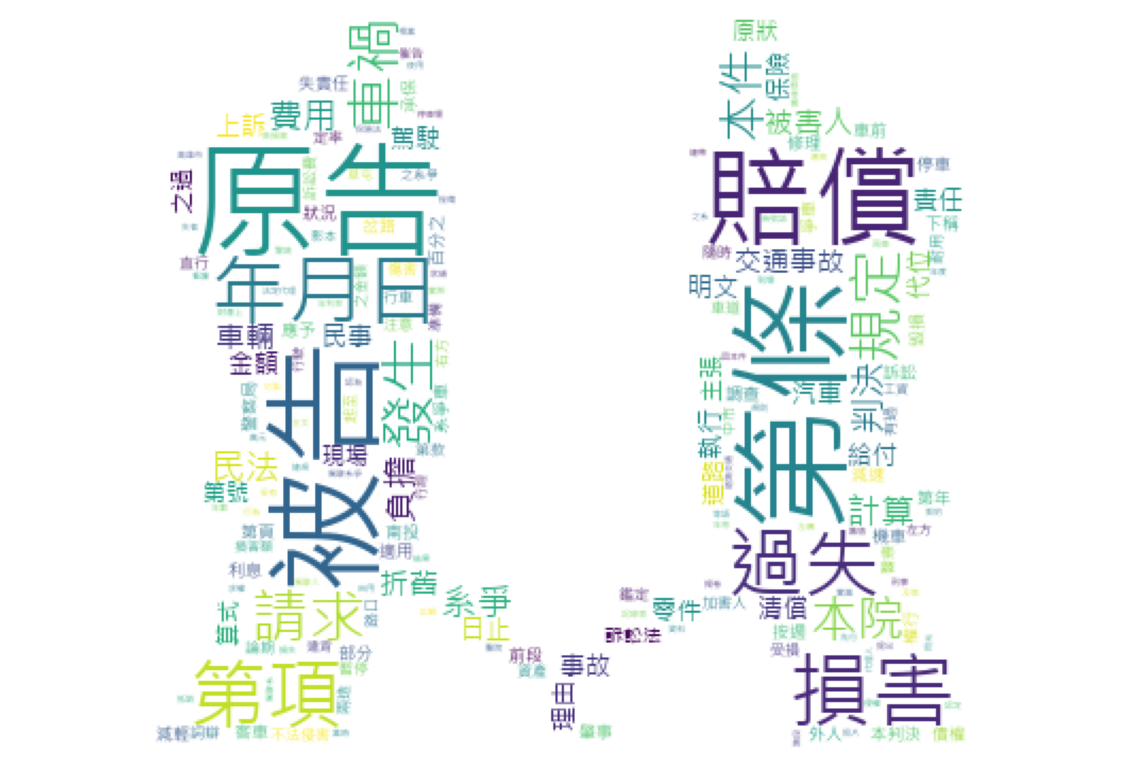

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()